# MLP Calculation example
This example is the exact same that is used in this article: https://theneuralblog.com/forward-pass-backpropagation-example/. This notebook will cover mathematical explanations as well as implementations of the network and the logic for a forward and a backward pass in python.

The neural network used in this example is one consisting of an Input layer, 1 hidden layer and an output layer. The sigmoid function is used as the activation function. The weights, biases and inputs can be seen in the picture below. 

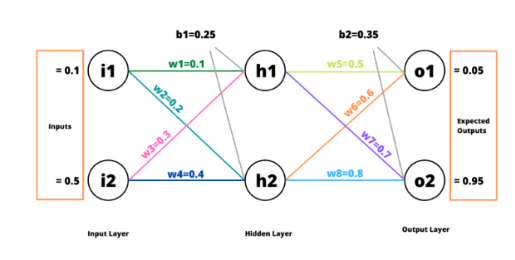

In [128]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('nn.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

### Initialize the neural network in code
The neural network will be defned with the given structure. In this notebook, there will be no neural network class created so that the code can be interrupted by mathematical explanations. A python file containing better code can be found in the mlp.py file. Since this notebook will just cover one training example, the inputs and desired outputs for this example are also already defined here.

In [129]:
import numpy as np

activations = np.zeros((2, 3))
weights = np.array([[0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8]])
biases = np.array([[0.25, 0.25], [0.35, 0.35]])
learning_rate = 0.6
input = [0.1, 0.5]
expected_output = [0.05, 0.95]
    
"""
    def backward_pass(self, expected_outputs):
        self.update_weights(self.calculate_gradients(expected_outputs))

    def calculate_gradients(self, expected_outputs):
        # Calculating each gradient between the last two layers by hand
        gradient_w5 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.activations[0, 1])
        gradient_w6 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.activations[1, 1])
        gradient_w7 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.activations[0, 1])
        gradient_w8 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.activations[1, 1])
        
        # Using numpy matrix multiplication
        # How np.outer works: Given two vectors a of length m and b of length n, np.outer(a, b) produces an m x n matrix.
        # Each element of the resulting matrix is the product of the corresponding elements of a and b.
        delta = (self.activations[:, 2] - expected_outputs) * (self.activations[:, 2] * (1 - self.activations[:, 2]))
        gradient_matrix_1 = np.outer(delta, self.activations[:, 1])

        # Calculating each gradient between the first two layers by hand. For simplicity, the calculations will be done in 
        # respect to E1 and E2 seperately before adding them together.
        # For w1
        gradient_w1_e1 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.weights[1, 0])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1_e2 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.weights[1, 2])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1 = gradient_w1_e1 + gradient_w1_e2

        # For w2
        gradient_w2_e1 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.weights[1, 1])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2_e2 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.weights[1, 3])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2 = gradient_w2_e1 + gradient_w2_e2

        # For w3
        gradient_w3_e1 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.weights[1, 0])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3_e2 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.weights[1, 2])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3 = gradient_w3_e1 + gradient_w3_e2

        # For w4
        gradient_w4_e1 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.weights[1, 1])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4_e2 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.weights[1, 3])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4 = gradient_w4_e1 + gradient_w4_e2



        # Replacing elements with the delta already calculated
        # For w1
        gradient_w1_e1 = delta[0]*(self.weights[1, 0])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1_e2 = delta[1]*(self.weights[1, 2])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1 = gradient_w1_e1 + gradient_w1_e2

        # For w2
        gradient_w2_e1 = delta[0]*(self.weights[1, 1])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2_e2 = delta[1]*(self.weights[1, 3])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2 = gradient_w2_e1 + gradient_w2_e2

        # For w3
        gradient_w3_e1 = delta[0]*(self.weights[1, 0])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3_e2 = delta[1]*(self.weights[1, 2])*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3 = gradient_w3_e1 + gradient_w3_e2

        # For w4
        gradient_w4_e1 = delta[0]*(self.weights[1, 1])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4_e2 = delta[1]*(self.weights[1, 3])*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4 = gradient_w4_e1 + gradient_w4_e2


        # Replacing hand matrix multiplication with numpy operations
        M_weighted_delta = np.outer(delta, self.weights[1, :])
        print(M_weighted_delta)
        print(delta[0]*(self.weights[1, 1]))
        # For w1
        gradient_w1_e1 = M_weighted_delta[0, 0]*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1_e2 = M_weighted_delta[1, 2]*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[0, 0])
        gradient_w1 = gradient_w1_e1 + gradient_w1_e2

        # For w2
        gradient_w2_e1 = M_weighted_delta[0, 1]*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2_e2 = M_weighted_delta[1, 3]*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[0, 0])
        gradient_w2 = gradient_w2_e1 + gradient_w2_e2

        # For w3
        gradient_w3_e1 = M_weighted_delta[0, 0]*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3_e2 = M_weighted_delta[1, 2]*(self.activations[0, 1]*(1-self.activations[0, 1]))*(self.activations[1, 0])
        gradient_w3 = gradient_w3_e1 + gradient_w3_e2

        # For w4
        gradient_w4_e1 = M_weighted_delta[0, 1]*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4_e2 = M_weighted_delta[1, 2]*(self.activations[1, 1]*(1-self.activations[1, 1]))*(self.activations[1, 0])
        gradient_w4 = gradient_w4_e1 + gradient_w4_e2

        return np.array([gradient_w1, gradient_w2, gradient_w3, gradient_w4, gradient_w5, gradient_w6, gradient_w7, gradient_w8])
    
    def update_weights(self, gradients):
        for i, gradient in enumerate(gradients):
            self.weights[i//4, i%4] = self.weights[i//4, i%4]-gradient*self.learning_rate

    def train(self, training_data, epochs):
        for i in range(epochs):
            for training_example in training_data:
                self.forward_pass(inputs=training_example[0], expected_outputs=training_example[1])
                self.backward_pass(expected_outputs=training_example[1])
        self.forward_pass(inputs=training_example[0], expected_outputs=training_example[1])
        return self.weights


nn = NeuralNetwork(layers=[2, 2, 1], learning_rate=0.1)
nn.train(training_data=np.array([[[0.1, 0.5], [0.05, 0.95]]]), epochs=1)"""

'\n    def backward_pass(self, expected_outputs):\n        self.update_weights(self.calculate_gradients(expected_outputs))\n\n    def calculate_gradients(self, expected_outputs):\n        # Calculating each gradient between the last two layers by hand\n        gradient_w5 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.activations[0, 1])\n        gradient_w6 = (self.activations[0, 2]-expected_outputs[0])*(self.activations[0, 2]*(1-self.activations[0, 2]))*(self.activations[1, 1])\n        gradient_w7 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.activations[0, 1])\n        gradient_w8 = (self.activations[1, 2]-expected_outputs[1])*(self.activations[1, 2]*(1-self.activations[1, 2]))*(self.activations[1, 1])\n        \n        # Using numpy matrix multiplication\n        # How np.outer works: Given two vectors a of length m and b of length n, np.outer(a, b) produces an m x 

## Forward pass
$h_1$ and $h_2$ can be calculated as follows:
$$h_1=\sigma(0.1*0.1+0.5*0.3+0.25) = \sigma(0.41) = 0,60108$$
$$h_2=\sigma (0.1*0.2+0.5*0.4+0.25)=\sigma (0.47)=0.61538$$
Now they can be used as input to calculate $o_1$ and $o_2$:
$$o_1=\sigma (0.60108*0.5+0.61538*0.6+0.35)=\sigma (1.01977)=0.73492$$
$$o_2=\sigma (0.60108*0.7+0.61538*0.8+0.35)=\sigma(1.26306)=0.77955$$
For this example the following error function $E$ will be used:
$$E=\frac{1}{2}(target-output)^2$$
It is similar to Mean Squared Error (MSE) with the only difference that the result of MSE is multiplied with 0.5. This is presumably done in this article because it makes the derivation of the function easier. With the error function the error for the output neurons $o_1$ and $o_2$ can be calculated:
$$E_1=\frac{1}{2}(0,05-0.73492)^2=0.23456$$
$$E_2=\frac{1}{2}(0.95-0.77955)^2=0.01452$$
Given $E_1$ and $E_2$, the total error can now be calculated:
$$E_{total}=E_1+E_2=0.24908$$

### Definition of the Activation function
This example uses the sigmoid function as the activation function which is why it and its derivative will be defined here. It is defined as $$\sigma (x)=\frac{1}{1+e^{-x}}$$

In [130]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Error function

In [131]:
def error_function(target, output):
    return 0.5*pow((target-output), 2)

## Forward pass
Given the activation function, error function as well as inputs, target outputs and the starting weights and architecture of the neural net, a forward pass can now be performed.

In [132]:
def forward_pass(inputs, expected_outputs):
    activations[:, 0] = inputs
    activations[0, 1] = sigmoid(activations[0, 0]*weights[0, 0]+activations[1, 0]*weights[0, 2]+biases[0, 0])
    activations[1, 1] = sigmoid(activations[0, 0]*weights[0, 1]+activations[1, 0]*weights[0, 3]+biases[0, 1])
    activations[0, 2] = sigmoid(activations[0, 1]*weights[1, 0]+activations[1, 1]*weights[1, 1]+biases[1, 0])
    activations[1, 2] = sigmoid(activations[0, 1]*weights[1, 2]+activations[1, 1]*weights[1, 3]+biases[1, 1])
    err1 = error_function(activations[0, 2], expected_outputs[0])
    err2 = error_function(activations[1, 2], expected_outputs[1])
    err_total = err1+err2
    print(f"Total error: {err_total}")

forward_pass(input, expected_output)

Total error: 0.24908954146037615


## Backward pass
Now that the forward pass is performed and all neurons have their activation value, a backward pass can be performed to update the weights. This is done using the backpropagation to calculate the gradients of each weight (so how much changes in the individual weight correlate to changes in the loss function). These gradients are then used to update the weights using the gradient descent algorithm.

This is done for each weight, starting with $w_5$.

In [133]:
def gradient_descent(starting_weight, learning_rate, gradient):
    return starting_weight-learning_rate*gradient

### For $w_5$
Starting of with $w_5$ as an example. Once this is calculated, the other weights can be calculated with ease since the derivatives will be given. The impact of $w_5$ on $E_{total}$ can be described as:
$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial output_{o1}}*\frac{\partial output_{o1}}{\partial sum_{o1}}*\frac{\partial sum_{o1}}{\partial w_5}$$
##### **Component 1: partial derivative of Error w.r.t. Output**
The total error of the network for a single training example can be written out as:
$$E_{total}=\frac{1}{2}(target_1-output_{o1})^2+\frac{1}{2}(target_2-output_{o2})^2$$
When deriving, the second part of the equation simply falls away because it is a constant in regard to $o1$. The left part of the equation is derived using the chain rule. The mathematical expression looks like this:
$$\frac{\partial E_{total}}{\partial output_{o1}}=2*\frac{1}{2}*(target_1-output_{o1})*(-1)=output_{o1}-target_1$$
##### **Component 2: partial derivative of Output w.r.t Sum**
The activation function used in this example is the sigmoid function.
$$\sigma(x)=\frac{1}{1+e^{-x}}$$
The derivative of the sigmoid function looks like this:
$$\sigma(x)=\sigma(x)*(1-\sigma(x))$$
Therefore, the derivative of the Logistic function is equal to output multiplied by (1-output):
$$\frac{\partial output_{o1}}{\partial sum_{o1}}=output_{o1}(1-output_{o1})$$
##### **Component 3: partial derivative of Sum w.r.t. Weight**
$$sum_{o1}=output_{h1}*w_5+output_{h2}*w_6+b_2$$
Therefore,
$$\frac{\partial sum_{o1}}{\partial w_5}=output_{h1}$$
##### **Putting the components together**
The original function was:
$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial output_{o1}}*\frac{\partial output_{o1}}{\partial sum_{o1}}*\frac{\partial sum_{o1}}{\partial w_5}$$
Substituting in the derivatives calculated in the 3 Component steps:
$$\frac{\partial E_{total}}{\partial w_5}=[output_{o1}-target_1]*[output_{o1}(1-output_{o1})]*[output_{h1}]$$
Filling in real values:
$$\frac{\partial E_{total}}{\partial w_5}=0.68492*0.19480*0.60108=0.08020$$
This number can be used to calculate the new $w_5$. We also need a learning rate $\eta$, defined here as $\eta=0.6$. Then we multiply the gradient with the negative gradient. This is the gradient descent algorithm where we go in the opposite direction of the gradient.
$$new\_{w_5}=w_5-\eta*\frac{\partial E_{total}}{\partial w_5}$$
Filling in the values:
$$new\_w_5=0.5-0.6*0.08020=0.45187$$

Now in code:

In [134]:
gradient_w5 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(activations[0, 1])
print(gradient_w5)
new_w5 = gradient_descent(weights[1, 0], learning_rate, gradient_w5)
print(new_w5)

0.08020312429316064
0.4518781254241036


As can be seen, the result from the code is the same as the result calculated manually, so I am assuming it is correct. Proceeding in a similar fashion, w6, w7 and w8 can be calculated.

### For $w_6$
Most of the work was already done for $w_5$ and can be reused so we can proceed as follows.
$$\frac{\partial E_{total}}{\partial w_6} = \frac{\partial E_{total}}{\partial output_{o1}}*\frac{\partial output_{o1}}{\partial sum_{o1}}*\frac{\partial sum_{o1}}{\partial w_6}$$
The first two components have already been calculated. The last component can be calculated as follows:
$$\frac{\partial sum_{o1}}{\partial w_6}=output_{h2}$$
Filling in the values:
$$\frac{\partial E_{total}}{\partial w_6}=0.68492*0.19480*0.61538=0.08211$$
The new $w_6$ is:
$$new\_w_6=0.6-0.6*0.08211=0.55073$$

Now in code:

In [135]:
gradient_w6 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(activations[1, 1])
print(gradient_w6)
new_w6 = gradient_descent(weights[1, 1], learning_rate, gradient_w6)
print(new_w6)

0.08211062248733934
0.5507336265075964


### For $w_7$
$$\frac{\partial E_{total}}{\partial w_7} = \frac{\partial E_{total}}{\partial output_{o2}}*\frac{\partial output_{o2}}{\partial sum_{o2}}*\frac{\partial sum_{o2}}{\partial w_7}$$
The components are calculated equivalent to the calculation for $w_5$:
$$\frac{\partial E_{total}}{\partial output_{o1}}=output_{o2}-target_2$$
$$\frac{\partial output_{o2}}{\partial sum_{o2}}=output_{o2}(1-output_{o2})$$
$$\frac{\partial sum_{o2}}{\partial w_7}=output_{h2}$$
Putting them together and filling in the values:
$$\frac{\partial E_{total}}{\partial w_7}=-0.17044*0.17184*0.60108=-0.01760$$
The new $w_7$ is:
$$new\_w_7=0.7-0.6*-0.01760=0.71056$$

Now in code:

In [136]:
gradient_w7 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(activations[0, 1])
print(gradient_w7)
new_w7 = gradient_descent(weights[1, 2], learning_rate, gradient_w7)
print(new_w7)

-0.017606525909155426
0.7105639155454933


### For $w_8$
we can procees similar wo w7 and get: $$new\_w_8=0.81081$$

In [137]:
gradient_w8 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(activations[1, 1])
print(gradient_w8)
new_w8 = gradient_descent(weights[1, 3], learning_rate, gradient_w8)
print(new_w8)

-0.018025267905473624
0.8108151607432842


With w8 calculated, this means that all weights connecting the second to the last layer are now ready. This means that in a next step, all weights connecting the input and the second layer can be calculated, starting with w1.

### For $w_1$
The weights in the hidden layer are calculated similar to the weights in the output layer. The only difference is that the chain gets a little longer.
For simplicity, we start by calculating $w_1$ in respect to $E_1$. Later it will be calculated in respect to $E_2$. Both can then be added up to get $E_{total}$. Starting with $E_1$.
$$\frac{\partial E_1}{\partial w_1}=\frac{\partial E_1}{\partial output_{o1}}*\frac{\partial output_{o1}}{\partial sum_{o1}}*\frac{\partial sum_{o1}}{\partial output_{h1}}*\frac{\partial output_{h1}}{\partial sum_{h1}}*\frac{\partial sum_{h1}}{\partial w_1}$$
##### **First component**
$$\frac{\partial E_1}{\partial output_{o1}}=output_{o1}-target_1$$
##### **Second component**
We already calculated the second component, so we can just reuse it here:
$$\frac{\partial output_{o2}}{\partial sum_{o2}}=output_{o2}(1-output_{o2})$$
##### **Third component**
$$\frac{\partial sum_{o1}}{\partial output_{h1}}=w_5$$
##### **Fourth component**
$$\frac{\partial output_{h1}}{\partial sum_{h1}}=output_{h1}*(1-output_{h1})$$
##### **Fifth component**
$$sum_{h1}=i_1*w_1+i_2*w_3+b_1$$
$$\frac{\partial sum_{h1}}{\partial w_1}=i_1$$
##### **Putting them all together and filling in the values**
$$\frac{\partial E_1}{\partial w_1}=0.68492*0.19480*0.5*0.23978*0.1=0.00159$$

Now in code:

In [138]:
gradient_w1_e1 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(weights[1, 0])*(activations[0, 1]*(1-activations[0, 1]))*(activations[0, 0])
print(gradient_w1_e1)

0.0015996999217386275


#### E2
$$\frac{\partial E_2}{\partial w_1}=\frac{\partial E_2}{\partial output_{o2}}*\frac{\partial output_{o2}}{\partial sum_{o2}}*\frac{\partial sum_{o2}}{\partial output_{h1}}*\frac{\partial output_{h1}}{\partial sum_{h1}}*\frac{\partial sum_{h1}}{\partial w_1}$$
##### **First component**
$$\frac{\partial E_2}{\partial output_{o2}}=output_{o2}-target_2$$
##### **Second component**
We already calculated the second component for $w_5$, so we can just reuse it here:
$$\frac{\partial output_{o1}}{\partial sum_{o1}}=output_{o1}(1-output_{o1})$$
##### **Third component**
$$sum_{o2}=output_{h1}*w_7+output_{h2}*w_8+b_2$$
##### **Fourth and fifth component**
Already computed for $E_1$
##### **Putting them all together and filling in the values**
$$\frac{\partial E_2}{\partial w_1}=-0.17044*0.17184*0.7*0.23978*0.1=-0.00049$$

In [139]:
gradient_w1_e2 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(weights[1, 2])*(activations[0, 1]*(1-activations[0, 1]))*(activations[0, 0])
print(gradient_w1_e2)

-0.0004916419617572628


#### Combination of E1 and E2
Now that we have $E_1$ and $E_2$, we can calculate:
$$\frac{\partial E_{total}}{\partial w_1}=\frac{\partial E_1}{\partial w_1}+\frac{\partial E_2}{\partial w_1}=0.00159+(−0.00049)=0.00110$$

In [140]:
gradient_w1 = gradient_w1_e1+gradient_w1_e2
print(gradient_w1)
new_w1 = gradient_descent(weights[0, 0], learning_rate, gradient_w1)
print(new_w1)

0.0011080579599813648
0.09933516522401119


### For w2, w3, w4
We can proceed in a similar fashion and get:
$$new\_{w_2}​=0.19919$$
$$new\_{w_3}=0.29667$$
$$new\_{w_4}=0.39597$$

In [141]:
# For w2
gradient_w2_e1 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(weights[1, 1])*(activations[1, 1]*(1-activations[1, 1]))*(activations[0, 0])
gradient_w2_e2 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(weights[1, 3])*(activations[1, 1]*(1-activations[1, 1]))*(activations[0, 0])
gradient_w2 = gradient_w2_e1 + gradient_w2_e2
new_w2 = gradient_descent(weights[0, 1], learning_rate, gradient_w2)
print(new_w2)

# For w3
gradient_w3_e1 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(weights[1, 0])*(activations[0, 1]*(1-activations[0, 1]))*(activations[1, 0])
gradient_w3_e2 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(weights[1, 2])*(activations[0, 1]*(1-activations[0, 1]))*(activations[1, 0])
gradient_w3 = gradient_w3_e1 + gradient_w3_e2
new_w3 = gradient_descent(weights[0, 2], learning_rate, gradient_w3)
print(new_w3)

# For w4
gradient_w4_e1 = (activations[0, 2]-expected_output[0])*(activations[0, 2]*(1-activations[0, 2]))*(weights[1, 1])*(activations[1, 1]*(1-activations[1, 1]))*(activations[1, 0])
gradient_w4_e2 = (activations[1, 2]-expected_output[1])*(activations[1, 2]*(1-activations[1, 2]))*(weights[1, 3])*(activations[1, 1]*(1-activations[1, 1]))*(activations[1, 0])
gradient_w4 = gradient_w4_e1 + gradient_w4_e2
new_w4 = gradient_descent(weights[0, 3], learning_rate, gradient_w4)
print(new_w4)


0.19919585606939597
0.2966758261200559
0.3959792803469798


### Updating the weights
Now that all the weights are calculated, they can be updated.